In [61]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelBinarizer
#import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# To load Input data

In [62]:
dataset_test = pd.read_csv('tcd-ml-1920-group-income-train.csv')
dataset_pred = pd.read_csv('tcd-ml-1920-group-income-test.csv')
store_data = dataset_pred.filter(['Instance'], axis=1)
dataset_test.columns = dataset_test.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dataset_pred.columns = dataset_pred.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

dataset_test.rename(columns={'Work_Experience_in_Current_Job_[years]': 'Work_Experience_in_Current_Job'}, inplace=True)
dataset_pred.rename(columns={'Work_Experience_in_Current_Job_[years]': 'Work_Experience_in_Current_Job'}, inplace=True)

/home/james/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/james/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Remove Instance Column

In [63]:
dataset_test = dataset_test.drop('Instance', 1)
dataset_pred = dataset_pred.drop('Instance', 1)
dataset_test.drop(dataset_test.loc[dataset_test['Total_Yearly_Income_[EUR]']==2548791].index, inplace=True)

# Change null to rand value between std dev around mean. Alternate could be panda interpolate


In [64]:
Column_Name_avg = dataset_test['Year_of_Record'].mean()
Column_Name_std = dataset_test['Year_of_Record'].std()
Column_Name_null_count = dataset_test['Year_of_Record'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
dataset_test['Year_of_Record'][np.isnan(dataset_test['Year_of_Record'])] = Column_Name_null_random_list
dataset_test['Year_of_Record'] = dataset_test['Year_of_Record'].astype(int)

Column_Name_avg = dataset_pred['Year_of_Record'].mean()
Column_Name_std = dataset_pred['Year_of_Record'].std()
Column_Name_null_count = dataset_pred['Year_of_Record'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
dataset_pred['Year_of_Record'][np.isnan(dataset_pred['Year_of_Record'])] = Column_Name_null_random_list
dataset_pred['Year_of_Record'] = dataset_pred['Year_of_Record'].astype(int)

/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Filling Gender Nan and other values


In [65]:
dataset_test.Gender = dataset_test.Gender.replace("f", "female")
dataset_test["Gender"].fillna("unknown", inplace = True)
dataset_test.Gender = dataset_test.Gender.replace("0", "unknown")

dataset_pred.Gender = dataset_pred.Gender.replace("f", "female")
dataset_pred["Gender"].fillna("unknown", inplace = True)
dataset_pred.Gender = dataset_pred.Gender.replace("0", "unknown")

# Filling University Degree Nan Values

In [66]:
dataset_test.University_Degree = dataset_test.University_Degree.replace("0", "No")
dataset_test["University_Degree"].fillna("No", inplace = True)

dataset_pred.University_Degree = dataset_pred.University_Degree.replace("0", "No")
dataset_pred["University_Degree"].fillna("No", inplace = True)

# Filling Haircolor Nan Values

In [67]:
dataset_test.Hair_Color = dataset_test.Hair_Color.replace("0", "Unknown")
dataset_test["Hair_Color"].fillna("Unknown", inplace = True)
dataset_test = dataset_test.drop('Hair_Color', 1)

dataset_pred.Hair_Color = dataset_pred.Hair_Color.replace("0", "Unknown")
dataset_pred["Hair_Color"].fillna("Unknown", inplace = True)
dataset_pred = dataset_pred.drop('Hair_Color', 1)

# Filling Profession Nan Values

In [68]:
dataset_test["Profession"].fillna("Unknown", inplace = True)
dataset_pred["Profession"].fillna("Unknown", inplace = True)

# Filling Housing_Situation Corrupt Values

In [69]:
dataset_test["Housing_Situation"] = dataset_test["Housing_Situation"].replace(0,'Unknown')
dataset_test["Housing_Situation"] = dataset_test["Housing_Situation"].replace('0','Unknown')
dataset_test["Housing_Situation"] = dataset_test["Housing_Situation"].replace('nA','Unknown')

dataset_pred["Housing_Situation"] = dataset_pred["Housing_Situation"].replace(0,'Unknown')
dataset_pred["Housing_Situation"] = dataset_pred["Housing_Situation"].replace('0','Unknown')
dataset_pred["Housing_Situation"] = dataset_pred["Housing_Situation"].replace('nA','Unknown')


dataset_test['Satisfation_with_employer'] = dataset_test['Satisfation_with_employer'].fillna(method='ffill')
dataset_pred['Satisfation_with_employer'] = dataset_pred['Satisfation_with_employer'].fillna(method='ffill')

# Convert work Experience in current job to float and replace #NUM! to mean of their Age

In [70]:
dataset_test.Work_Experience_in_Current_Job = dataset_test.Work_Experience_in_Current_Job.replace("#NUM!", None)
dataset_test['Work_Experience_in_Current_Job'] = dataset_test['Work_Experience_in_Current_Job'].astype(float)
dataset_test.value = dataset_test.groupby('Age')['Work_Experience_in_Current_Job'].apply(lambda x: x.fillna(x.median()))
dataset_test.value = dataset_test.Work_Experience_in_Current_Job.fillna(dataset_test.Work_Experience_in_Current_Job.median())

dataset_pred.Work_Experience_in_Current_Job = dataset_pred.Work_Experience_in_Current_Job.replace("#NUM!", None)
dataset_pred['Work_Experience_in_Current_Job'] = dataset_pred['Work_Experience_in_Current_Job'].astype(float)
dataset_pred.value = dataset_pred.groupby('Age')['Work_Experience_in_Current_Job'].apply(lambda x: x.fillna(x.median()))
dataset_pred.value = dataset_pred.Work_Experience_in_Current_Job.fillna(dataset_pred.Work_Experience_in_Current_Job.median())

/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/home/james/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


# Remove EUR in Yearly_Income to make it numerical value 

In [71]:
dataset_test['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'] = dataset_test['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'].replace('EUR', '', regex=True).astype(float)
dataset_pred['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'] = dataset_pred['Yearly_Income_in_addition_to_Salary_e.g._Rental_Income'].replace('EUR', '', regex=True).astype(float)

# Label encoding the categorical columns

In [72]:
for col in dataset_test.dtypes[dataset_test.dtypes == 'object'].index.tolist():
    feat_le = LabelEncoder()
    train_list = dataset_test[col].unique()
    dataset_test.loc[1201,col] = 'other'
    test_list = dataset_pred[col].unique()
    test_replace = list(set(test_list) - set(train_list))
    dataset_pred[col] = dataset_pred[col].replace(test_replace, 'other')
    feat_le.fit(dataset_test[col].unique().astype(str))
    dataset_test[col] = feat_le.transform(dataset_test[col].astype(str))
    dataset_pred[col] = feat_le.transform(dataset_pred[col].astype(str))



### This function takes a string column name and returns a list
### containing indices of dataframe that have outliers in that column
### Refer: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623


In [73]:
def OutlierByColumn(colname):
    rows = dataset_test.shape[0]
    col_std = np.std(dataset_test[colname])
    col_mean = np.mean(dataset_test[colname])
    anomaly_cut_off = col_std * 3
    lower_limit  = col_mean - anomaly_cut_off 
    upper_limit = col_mean + anomaly_cut_off
    anomalies_indices = []
    for i in range(rows):
        ele = dataset_test[colname][i]
        if ele > upper_limit or ele < lower_limit:
            anomalies_indices.append(i)
    return anomalies_indices

# Running outlier

In [74]:
arr1 = OutlierByColumn('Work_Experience_in_Current_Job')
arr2 = OutlierByColumn('Age')
#arr3 = OutlierByColumn('Body_Height_[cm]')
arr4 = OutlierByColumn('Yearly_Income_in_addition_to_Salary_e.g._Rental_Income')
arr5 = OutlierByColumn('Size_of_City')

In [75]:
#Union of all lists 
union_index = np.union1d(arr1,arr2)
#union_index = np.union1d(union_index,arr3)
union_index = np.union1d(union_index,arr4)
union_index = np.union1d(union_index,arr5)
len(union_index)
dataset_test = dataset_test.drop(union_index)

# Normalise columns

In [76]:
y = dataset_test['Total_Yearly_Income_[EUR]'].values
dataset_test.drop('Total_Yearly_Income_[EUR]', axis=1, inplace=True)


In [77]:

x = dataset_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset_test = pd.DataFrame(x_scaled)
X = dataset_test[dataset_test.columns].values

# View Data

In [78]:
dataset_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.875,0.171875,0.531250,0.75,0.666667,0.436620,0.005747,0.004655,0.450923,0.50,1.0,0.526316,0.0
1,0.0,0.875,0.130208,0.153125,0.75,0.000000,0.042254,0.005747,0.421465,0.459779,0.50,0.0,0.473684,0.0
2,0.0,0.875,0.177083,0.656250,0.75,0.000000,0.478873,0.005747,0.152092,0.881919,0.00,0.0,0.326316,0.0
3,0.0,0.875,0.364583,0.562500,0.00,0.000000,0.394366,0.011494,0.011000,0.744649,0.50,1.0,0.368421,0.0
4,0.0,0.875,0.265625,0.250000,0.25,0.666667,0.014085,0.011494,0.004344,0.561624,0.25,1.0,0.515789,0.0


In [79]:
y.view()

array([  6182.05,   6819.69,   8663.53, ..., 254738.53,  11182.98,
         1280.21])

In [80]:

X = dataset_test[dataset_test.columns].values

In [81]:
print(y.shape)
print(X.shape)

(997110,)
(997110, 14)


In [82]:
#split 80% of the data to the training set while 20% of the data to test set.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [84]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(897399, 14) (99711, 14)
(897399,) (99711,)


In [85]:

#dataset_pred.drop('Total_Yearly_Income_[EUR]', axis=1, inplace=True)
#X_test = dataset_pred[dataset_pred.columns].values

# KERAS Model

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from keras import losses

In [116]:
sgd = optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
losses = losses.mean_absolute_percentage_error

In [117]:
model = Sequential()
model.add(Dense(500,kernel_initializer='RandomUniform', input_dim=14, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(250,kernel_initializer='normal', activation= "relu"))
model.add(Dense(1))

In [118]:
model.compile(loss= losses , optimizer=sgd, metrics=["mean_absolute_error"])

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 500)               7500      
_________________________________________________________________
dropout_15 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 251       
Total params: 133,001
Trainable params: 133,001
Non-trainable params: 0
_________________________________________________________________


In [120]:
hist = model.fit(X_train, Y_train,
          batch_size=1024, epochs=10,
          validation_split=0.2)

Train on 717919 samples, validate on 179480 samples
Epoch 1/10
717919/717919 [==============================] - 5s 7us/step - loss: 57.7088 - mean_absolute_error: 40983.5140 - val_loss: 46.9270 - val_mean_absolute_error: 34089.8620
Epoch 2/10
717919/717919 [==============================] - 5s 6us/step - loss: 48.2443 - mean_absolute_error: 33334.3853 - val_loss: 43.8468 - val_mean_absolute_error: 31811.3939
Epoch 3/10
717919/717919 [==============================] - 5s 6us/step - loss: 46.0362 - mean_absolute_error: 31602.4882 - val_loss: 42.6873 - val_mean_absolute_error: 28198.5806
Epoch 4/10
717919/717919 [==============================] - 5s 6us/step - loss: 44.6227 - mean_absolute_error: 29936.0691 - val_loss: 43.6389 - val_mean_absolute_error: 29313.3441
Epoch 5/10
717919/717919 [==============================] - 5s 6us/step - loss: 43.7837 - mean_absolute_error: 29472.2951 - val_loss: 42.4263 - val_mean_absolute_error: 28794.7464
Epoch 6/10
717919/717919 [======================

In [53]:
model.evaluate(X_test, Y_test)[1]

99711/99711 [==============================] - 5s 52us/step


30782.822474999623

# Visualizing Loss & Accuracy

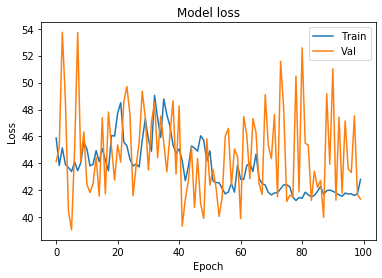

In [54]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Output

In [ ]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
store_data['Total Yearly Income [EUR]'] = y_pred
store_data.to_csv('output.csv', sep=',')